In [ ]:
!pip install -q imageio
!pip install -q opencv-python
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import cv2

# Import matplotlib libraries
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

import matplotlib.pyplot as plt

from PIL import Image
import tensorflow as tf
import tensorflow.keras.backend as K
from google.colab.patches import cv2_imshow
from tensorflow.python.ops.numpy_ops import np_config
import pandas as pd
# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display

# loading the data

In [ ]:
trueData=np.load('pullUP_T.npy')
falseData=np.load('pullUP_F.npy')

# Data Analysis

In [ ]:
trueData=np.squeeze(trueData)
falseData=np.squeeze(falseData)

In [ ]:
trueLabes=np.ones((trueData.shape[0],1))
falseLabels=np.zeros((falseData.shape[0],1))

In [ ]:
def mean_std_x_y(data):
  # calculate the mean x and y values for each keypoint separately
  mean_x = np.mean(data[:,:,0], axis=0)
  mean_y = np.mean(data[:,:,1], axis=0)

  # define the connections between keypoints
  connections = [(0,1), (0,2), (1,3), (2,4), (0,5), (0,6), (5,7), (7,9), (6,8), (8,10), (5,6), (5,11), (6,12), (11,12), (11,13), (13,15), (12,14), (14,16)]
  # specify the size of the figure
  plt.figure(figsize=(8, 6))
  # plot the mean x and y values for each keypoint and connect them
  for i, (x, y) in enumerate(zip(mean_x, mean_y)):
      plt.scatter(x, y)
      for a, b in connections:
          plt.plot([mean_x[a], mean_x[b]], [mean_y[a], mean_y[b]], color='gray', linestyle='-', linewidth=1)

  plt.xlabel('Mean X')
  plt.ylabel('Mean Y')
  plt.legend()
#########################################################################################

  # calculate the standard deviation of the x and y values for each keypoint separately
  std_x = np.std(data[:,:,0], axis=0)
  std_y = np.std(data[:,:,1], axis=0)

  # create a bar chart of the standard deviation of the x and y values for each keypoint
  x = np.arange(17)
  width = 0.35
  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, std_x, width, label='X')
  rects2 = ax.bar(x + width/2, std_y, width, label='Y')
  ax.set_xlabel('Keypoint')
  ax.set_ylabel('Standard deviation')
  ax.set_title('Standard deviation of X and Y values for each keypoint')
  ax.set_xticks(x)
  ax.legend()
  plt.show()



In [ ]:
def heatmap_x_y(data):
  # create a heatmap of the distribution of keypoints
  fig, ax = plt.subplots()
  hist = ax.hist2d(data[:,:,0].flatten(), data[:,:,1].flatten(), bins=50)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_title('Heatmap of the distribution of keypoints')
  fig.colorbar(hist[3], ax=ax)
  plt.show()

In [ ]:
def mean_std_confi(data):
  # calculate the mean confidence for each keypoint separately
  mean_conf = np.mean(data[:,:,2], axis=0)

  # create a bar chart of the mean confidence for each keypoint
  x = np.arange(17)
  width = 0.35
  fig, ax = plt.subplots()
  rects1 = ax.bar(x, mean_conf, width)
  ax.set_xlabel('Keypoint')
  ax.set_ylabel('Mean confidence')
  ax.set_title('Mean confidence for each keypoint')
  ax.set_xticks(x)
  plt.show()
############################################################################
  # calculate the standard deviation of the confidence for each keypoint separately
  std_conf = np.std(data[:,:,2], axis=0)

  # create a bar chart of the standard deviation of the confidence for each keypoint
  x = np.arange(17)
  width = 0.35
  fig, ax = plt.subplots()
  rects1 = ax.bar(x, std_conf, width)
  ax.set_xlabel('Keypoint')
  ax.set_ylabel('Standard deviation')
  ax.set_title('Standard deviation of confidence for each keypoint')
  ax.set_xticks(x)
  plt.show()

# True Data

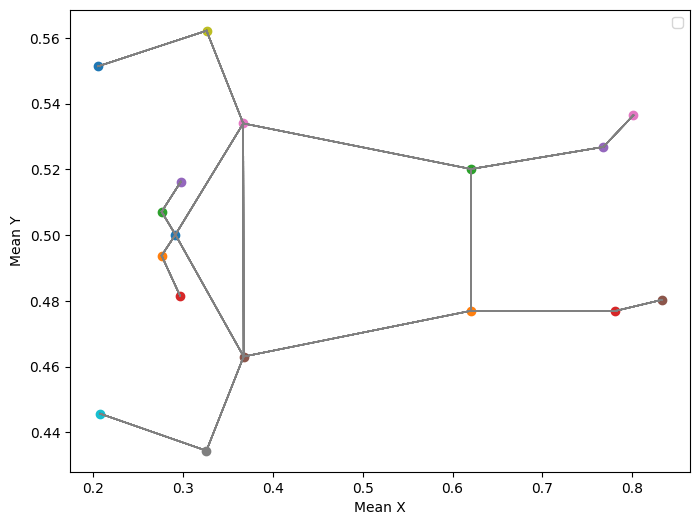

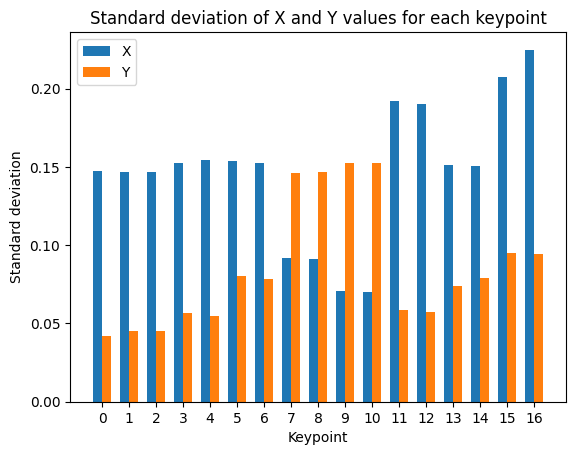

In [ ]:
mean_std_x_y(trueData)

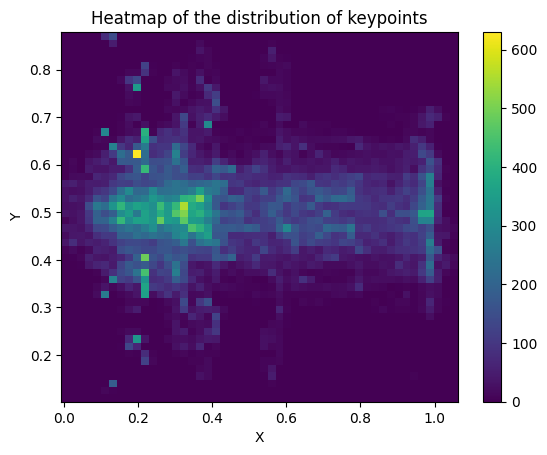

In [ ]:
heatmap_x_y(trueData)

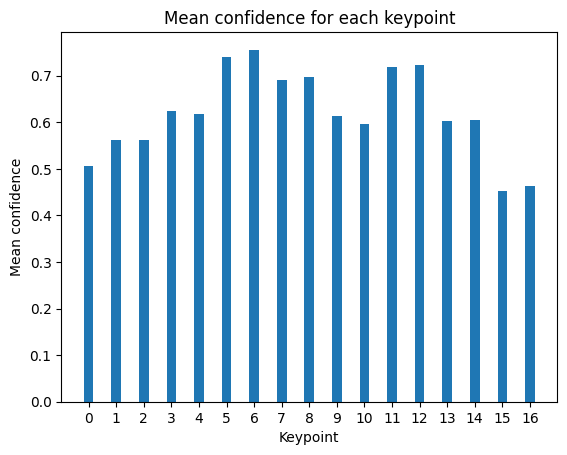

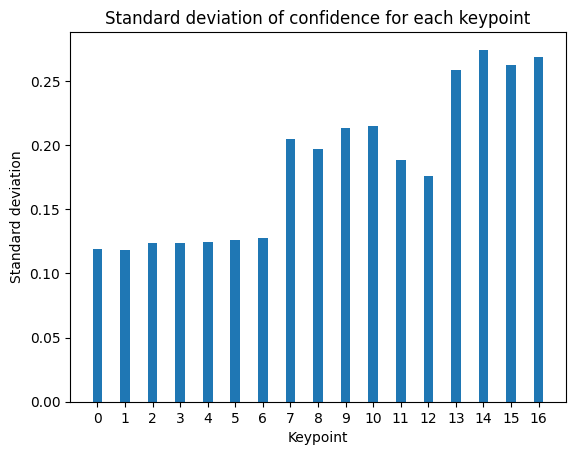

In [ ]:
mean_std_confi(trueData)

# False Data

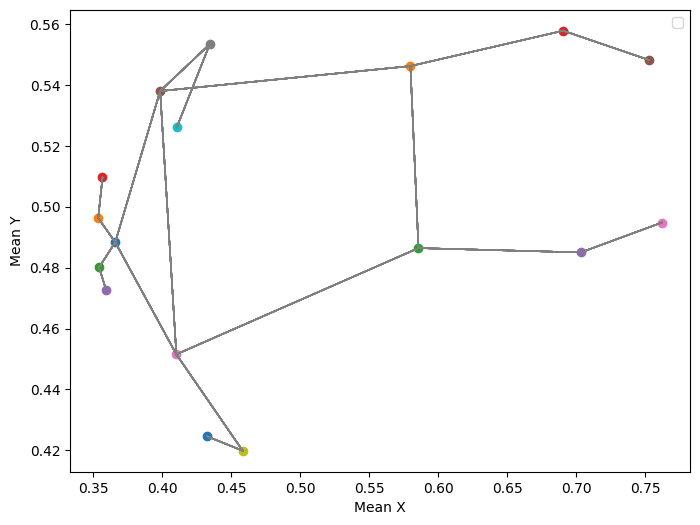

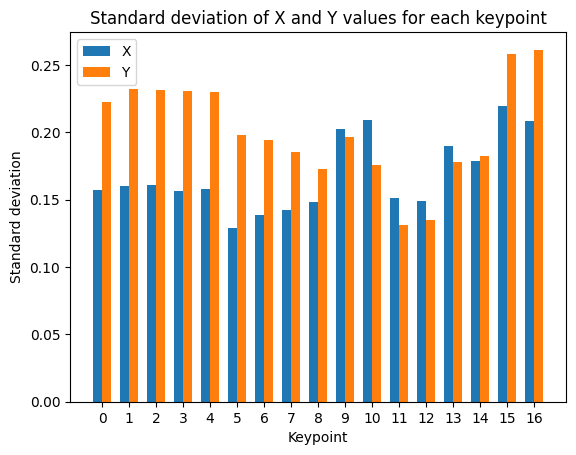

In [ ]:
mean_std_x_y(falseData)

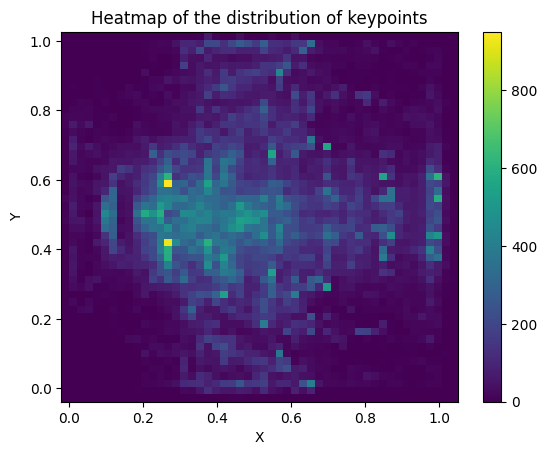

In [ ]:
heatmap_x_y(falseData)

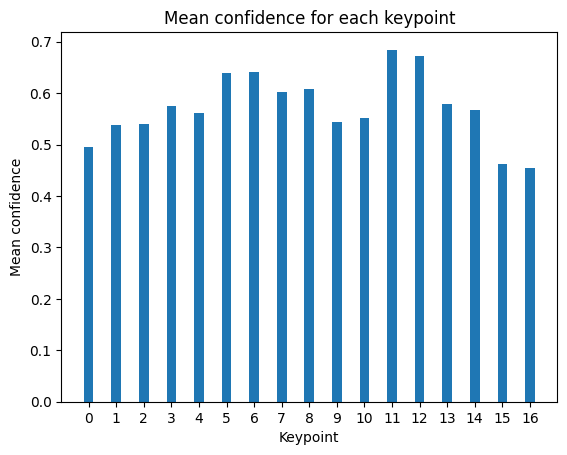

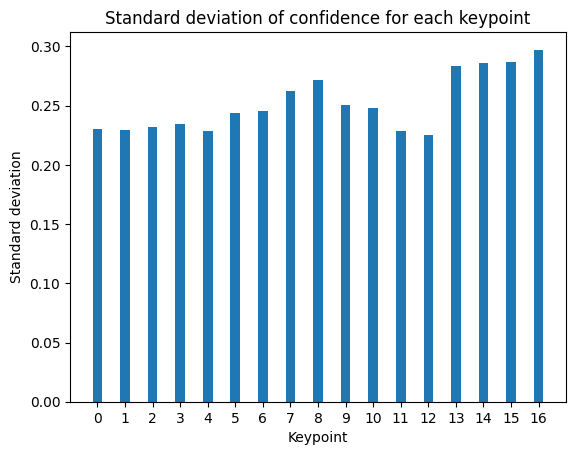

In [ ]:
mean_std_confi(falseData)

# Generating The Dataset

In [ ]:
Data=np.concatenate((trueData, falseData))
labels=np.concatenate((trueLabes, falseLabels))
Data=Data.reshape((Data.shape[0], -1))

In [ ]:
dataSet = pd.DataFrame(Data)
dataSet['Label'] = labels
print(dataSet)


              0         1         2         3         4         5         6  \
0      0.241108  0.471327  0.573825  0.211545  0.439883  0.609820  0.207885   
1      0.241786  0.471396  0.575313  0.212048  0.439816  0.610477  0.208341   
2      0.255604  0.468944  0.600364  0.227302  0.439534  0.600750  0.224995   
3      0.271612  0.467502  0.593033  0.243399  0.439005  0.604255  0.240289   
4      0.283533  0.467360  0.590714  0.258370  0.438332  0.621190  0.255666   
...         ...       ...       ...       ...       ...       ...       ...   
19881  0.406320  0.319878  0.381456  0.384293  0.309527  0.533914  0.400039   
19882  0.406719  0.323947  0.394210  0.384584  0.309538  0.488218  0.400685   
19883  0.404276  0.323878  0.389402  0.380224  0.308070  0.512390  0.392473   
19884  0.398805  0.325501  0.440699  0.377843  0.313418  0.428769  0.389230   
19885  0.399027  0.321922  0.411806  0.378661  0.310249  0.572195  0.390980   

              7         8         9  ...        42 

In [ ]:
dataSet = dataSet.sample(frac=1).reset_index(drop=True)
print(dataSet)

              0         1         2         3         4         5         6  \
0      0.414274  0.512771  0.566444  0.401849  0.531036  0.630657  0.399837   
1      0.238784  0.579732  0.689065  0.204383  0.593788  0.705285  0.194654   
2      0.438303  0.234928  0.053487  0.389165  0.259297  0.159085  0.392102   
3      0.407979  0.388640  0.564277  0.398207  0.398896  0.867272  0.393269   
4      0.257735  0.564300  0.549202  0.256301  0.575738  0.653516  0.255406   
...         ...       ...       ...       ...       ...       ...       ...   
19881  0.472453  0.013740  0.079810  0.461054  0.003683  0.088350  0.462741   
19882  0.217967  0.520109  0.583433  0.205894  0.537245  0.566423  0.205250   
19883  0.318611  0.503385  0.532357  0.305121  0.499844  0.558199  0.306080   
19884  0.365003  0.516943  0.792096  0.351765  0.534424  0.831201  0.349424   
19885  0.491191  0.001873  0.237527  0.480246  0.002214  0.211391  0.481354   

              7         8         9  ...        42 

In [ ]:
dataSet.dropna(inplace=True) # removes rows with missing data
dataSet.drop_duplicates(inplace=True) # removes duplicate rows

In [ ]:
dataSet

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,Label
0,0.414274,0.512771,0.566444,0.401849,0.531036,0.630657,0.399837,0.508412,0.552270,0.406642,...,0.758490,0.368297,0.708605,0.908153,0.483046,0.720282,0.890200,0.464781,0.645452,0.0
1,0.238784,0.579732,0.689065,0.204383,0.593788,0.705285,0.194654,0.536034,0.857052,0.214173,...,0.985148,0.370727,0.042631,0.951776,0.546183,0.010918,1.009965,0.616205,0.035840,0.0
2,0.438303,0.234928,0.053487,0.389165,0.259297,0.159085,0.392102,0.246766,0.125590,0.433905,...,0.633441,0.694506,0.558914,0.494082,0.916525,0.337711,0.518012,0.927171,0.333892,0.0
3,0.407979,0.388640,0.564277,0.398207,0.398896,0.867272,0.393269,0.370678,0.720681,0.413659,...,0.912359,0.482594,0.697896,1.001534,0.595226,0.248007,0.999257,0.556489,0.095615,0.0
4,0.257735,0.564300,0.549202,0.256301,0.575738,0.653516,0.255406,0.577275,0.699240,0.286838,...,0.682898,0.530702,0.720100,0.857451,0.523833,0.786749,0.838329,0.539039,0.707628,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19881,0.472453,0.013740,0.079810,0.461054,0.003683,0.088350,0.462741,0.006235,0.099738,0.447121,...,0.515790,0.021150,0.432649,0.382307,0.305971,0.513557,0.511185,0.301932,0.434094,0.0
19882,0.217967,0.520109,0.583433,0.205894,0.537245,0.566423,0.205250,0.515646,0.600404,0.219125,...,0.708222,0.488991,0.787087,0.881291,0.559657,0.636291,0.880278,0.520447,0.650306,0.0
19883,0.318611,0.503385,0.532357,0.305121,0.499844,0.558199,0.306080,0.499179,0.541565,0.307655,...,0.729369,0.496476,0.670612,0.881893,0.454307,0.539147,0.897172,0.474562,0.654785,1.0
19884,0.365003,0.516943,0.792096,0.351765,0.534424,0.831201,0.349424,0.515466,0.847680,0.360186,...,0.699144,0.352506,0.823751,0.848086,0.486915,0.734045,0.831969,0.455564,0.671235,0.0


# spliting the dataset


In [ ]:
from sklearn.model_selection import train_test_split
train_val_data, test_data = train_test_split(dataSet, test_size=0.2, random_state=42)  # 80% train/validation, 20% test
train_data, val_data = train_test_split(train_val_data, test_size=0.25, random_state=42)  # 60% train, 20% validation
print(test_data)

              0         1         2         3         4         5         6  \
3950   0.452123  0.984307  0.129076  0.449638  0.985651  0.169795  0.446063   
1272   0.891779  0.483441  0.119450  0.922138  0.470993  0.156055  0.899562   
5006   0.495788  0.034438  0.693820  0.480385  0.013265  0.632854  0.479685   
17944  0.366206  0.556530  0.642708  0.349623  0.576134  0.526209  0.349735   
3165   0.208581  0.427455  0.510736  0.206850  0.415953  0.486568  0.214054   
...         ...       ...       ...       ...       ...       ...       ...   
9711   0.498629  0.087214  0.456516  0.483167  0.075099  0.422595  0.484909   
3794   0.258800  0.523015  0.712224  0.243124  0.536637  0.760739  0.243233   
13238  0.266444  0.522313  0.851163  0.252165  0.537266  0.784377  0.251246   
4148   0.292897  0.494085  0.350980  0.281324  0.503689  0.535121  0.282096   
2813   0.352651  0.587707  0.446810  0.360870  0.600777  0.488446  0.361869   

              7         8         9  ...        42 

In [ ]:
xtrain=train_data.iloc[:, :51].values
ytrain=train_data['Label'].values
xtest=test_data.iloc[:, :51].values
ytest=test_data['Label'].values
xval=val_data.iloc[:, :51].values
yval=val_data['Label'].values

In [ ]:
xtrain=xtrain.reshape((xtrain.shape[0], 17,3))
xtest=xtest.reshape((xtest.shape[0], 17,3))
xval=xval.reshape((xval.shape[0], 17,3))

# Form Correctness Model

In [ ]:
import tensorflow as tf

# Define the input shape
input_shape = (17,3)

# Create a sequential model
model = tf.keras.models.Sequential()

# Add a flatten layer to flatten the input into a vector
model.add(tf.keras.layers.Flatten(input_shape=input_shape))

# Add a dense layer with 64 nodes, using ReLU activation
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(tf.keras.layers.Dropout(0.2))

# Add another dense layer with 32 nodes, using ReLU activation
model.add(tf.keras.layers.Dense(32, activation='relu'))

# Add the output layer with 1 node, using sigmoid activation
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on your data
history = model.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_data=(xval, yval))

Epoch 1/20
373/373 [==============================] - 3s 2ms/step - loss: 0.3830 - accuracy: 0.8182 - val_loss: 0.2608 - val_accuracy: 0.8792
Epoch 2/20
373/373 [==============================] - 1s 2ms/step - loss: 0.2496 - accuracy: 0.8846 - val_loss: 0.2638 - val_accuracy: 0.8566
Epoch 3/20
373/373 [==============================] - 1s 3ms/step - loss: 0.2022 - accuracy: 0.9096 - val_loss: 0.1730 - val_accuracy: 0.9263
Epoch 4/20
373/373 [==============================] - 1s 4ms/step - loss: 0.1646 - accuracy: 0.9314 - val_loss: 0.1353 - val_accuracy: 0.9502
Epoch 5/20
373/373 [==============================] - 1s 2ms/step - loss: 0.1396 - accuracy: 0.9432 - val_loss: 0.1355 - val_accuracy: 0.9338
Epoch 6/20
373/373 [==============================] - 1s 2ms/step - loss: 0.1252 - accuracy: 0.9494 - val_loss: 0.1217 - val_accuracy: 0.9472
Epoch 7/20
373/373 [==============================] - 1s 2ms/step - loss: 0.1145 - accuracy: 0.9550 - val_loss: 0.0943 - val_accuracy: 0.9678
Epoch 

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 51)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                3328      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss, test_acc = model.evaluate(xtest, ytest)

print('Test accuracy:', test_acc)

125/125 [==============================] - 0s 867us/step - loss: 0.0499 - accuracy: 0.9819
Test accuracy: 0.9818868041038513


# Saving The Model

In [ ]:
from google.colab import files

In [ ]:
model.save('pullUp_v2.h5')

# Convert the saved TensorFlow model to a TensorFlow Lite model

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted TensorFlow Lite model to a file

with open('pullUp_v2.tflite', 'wb') as f:
    f.write(tflite_model)
files.download('pullUp_v2.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>